### Student Name: Aidan Keeshan
### Student ID: 18200117

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

## Task 1 Import CSV

The first column of the source CSV has no title and is linear ascending integer from zero.    
I assume this was exported from pandas which exports the index unless specified otherwise.    
On import a new index was created and a field called 'Unnamed: 0' was in place or the original index.    
To remove redundancy I have set index_col=['Unnamed: 0'] as appeared in  df.columns.values.   
This may be unstable solution as undocumented, as far as I can see.   
It is not guaranteed the field name will be called that in all version of pandas.

In [3]:
df = pd.read_csv("bank_et2.csv",index_col=['Unnamed: 0'])
"|".join(df.columns.values)

'age|job|marital|education|default|balance|ratio_bal_ln|ratio_ln_inc|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|subscribed'

In [10]:
df_orig = pd.read_csv("../etivity1/bank_et1.csv",index_col=['Unnamed: 0'])
"|".join(df_orig.columns.values)

'age|job|marital|education|default|balance|ratio_bal_ln|ratio_ln_inc|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|subscribed'

In [17]:
df_diff = df.where((df.values != df_orig.values))
2000 - df_diff.isna().sum()

age                0
job                0
marital            0
education          0
default            0
balance            0
ratio_bal_ln    2000
ratio_ln_inc    2000
housing            0
loan               0
contact            0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
subscribed         0
dtype: int64

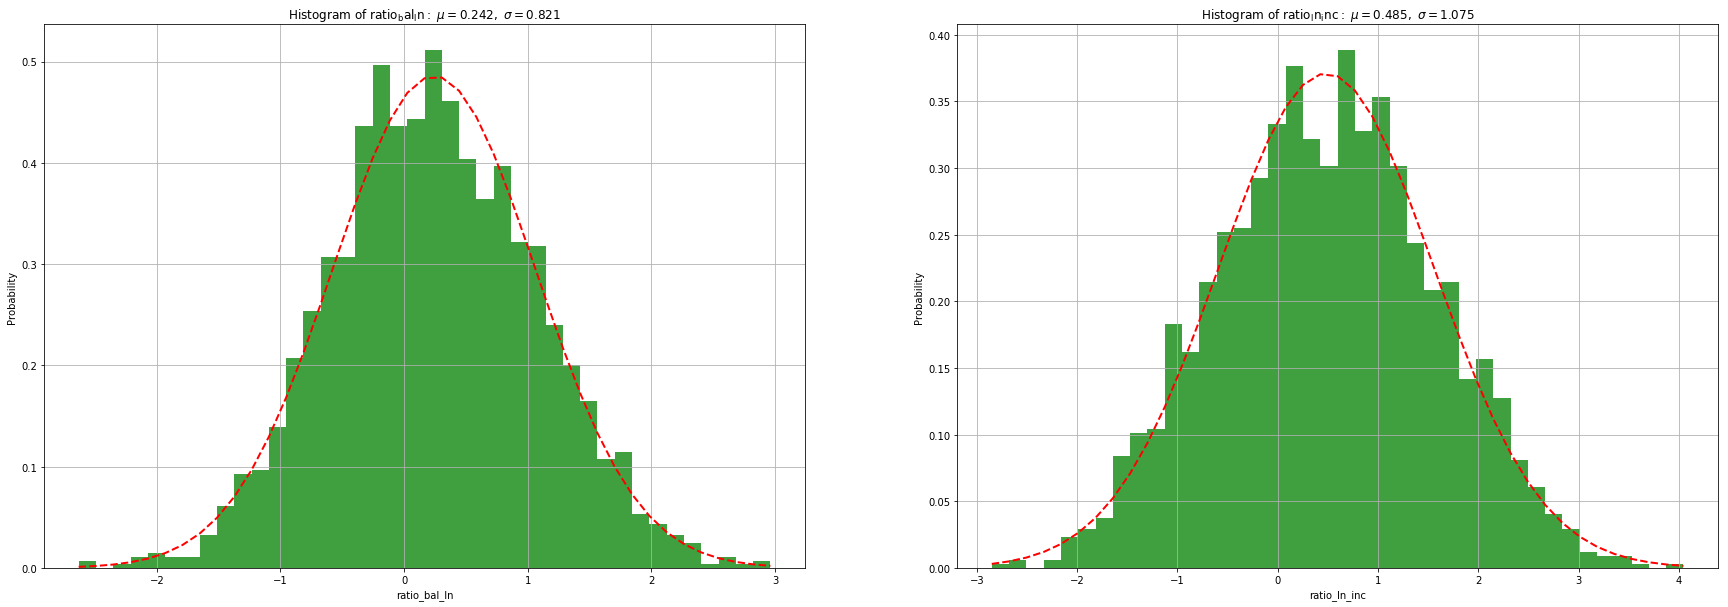

In [18]:
from scipy.stats import norm
import matplotlib.mlab as mlab

def plot_norm(ax,column):
    data = df[column]
    (mu, sigma) = norm.fit(data)
    n, bins, patches = ax.hist(data, 40, normed=1, facecolor='green', alpha=0.75)
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.title(r'$\mathrm{Histogram\ of\ '+column+':}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    ax.grid(True)

f = plt.figure(figsize=(30,10))
ax = f.add_subplot(1,2,1)
plot_norm(ax,'ratio_bal_ln')
ax = f.add_subplot(1,2,2)
plot_norm(ax,'ratio_ln_inc')
f.show()

### Top 5 Records

In [5]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


### Bottom 5 Records

In [6]:
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes
